## Scaler dataframe for Auger Open Data 
### Análisis de potencias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from augerscalerpy.scaler_clear import plotscaler 
import astropy
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_body
import astropy.units as u

Hay  (11805, 4) líneas vacías


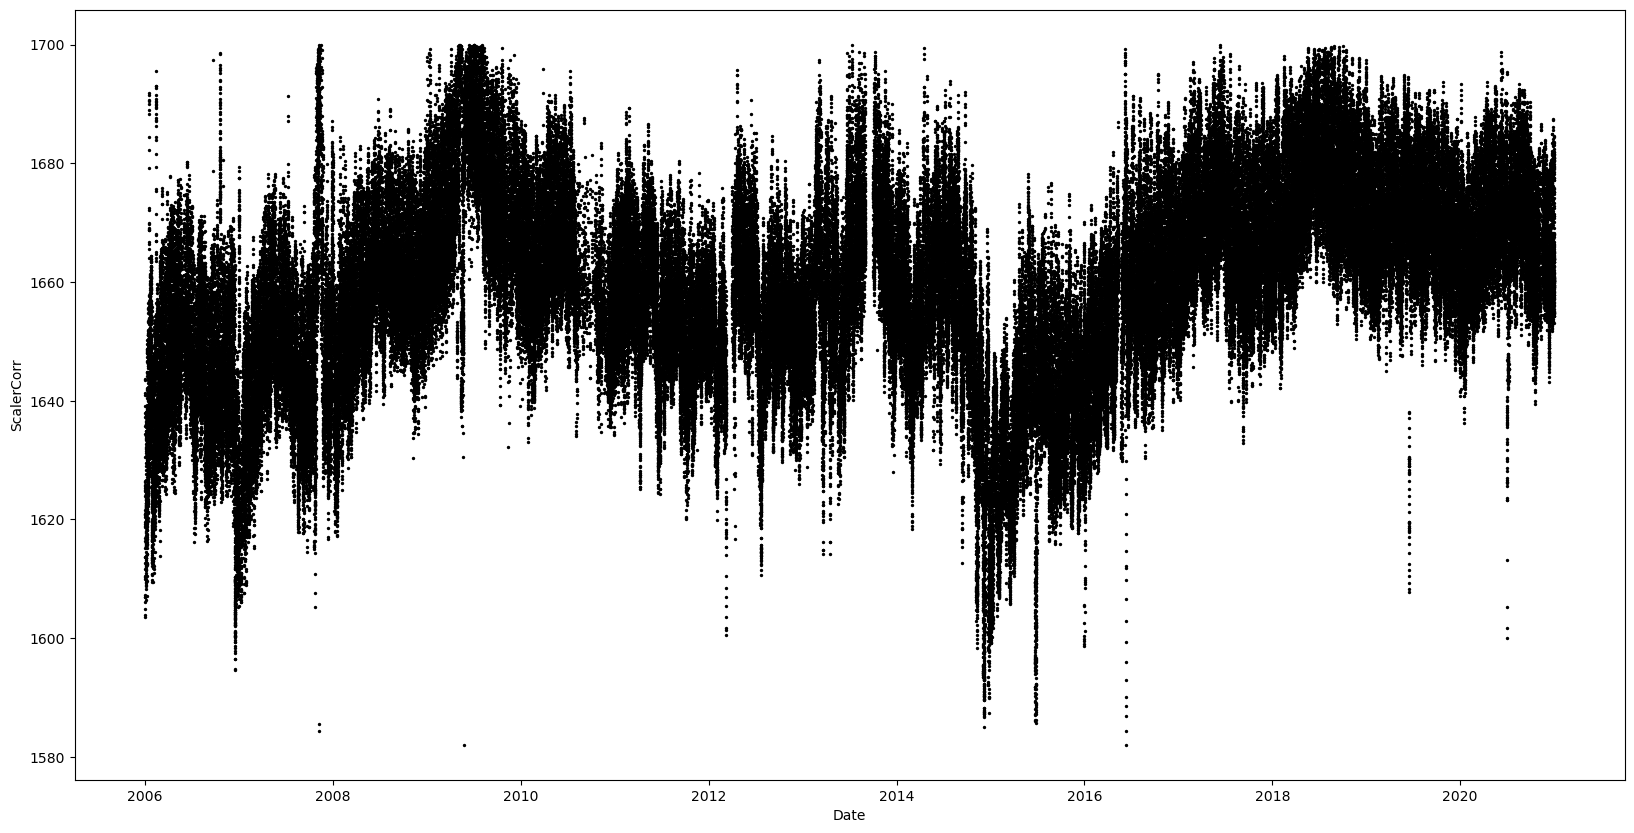

In [2]:
scaler3600s = plotscaler('scaler_ALL_hourly_11abril.csv','scaler_3600s')

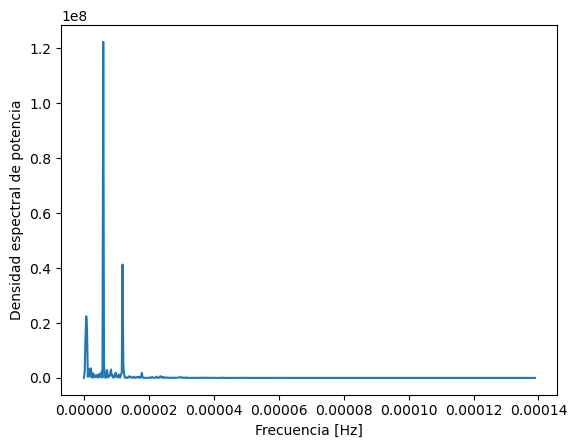

In [3]:
## ESPECTRO DE POTENCIAS DE LOS DATOS

from scipy.signal import periodogram

# Cargamos los datos del dataframe scaler3600s

# Seleccionamos los datos correspondientes al mes de junio de 2016
mes = scaler3600s[(scaler3600s['Date'] >= "2017-06-01") & (scaler3600s['Date'] < "2017-07-01")]


# Eliminamos los valores nulos de la columna ScalerCorr
data = mes.dropna(subset=['ScalerCorr'])

# Obtenemos la frecuencia y la densidad espectral de potencia de los datos
f, psd = periodogram(data['ScalerCorr'], fs=1/3600)

# Graficamos el espectro de potencias
plt.plot(f, psd)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.show()

/tmp/ipykernel_22161/2980186425.py:4: RuntimeWarning: divide by zero encountered in true_divide
  periods = 1/frequencies/3600/24


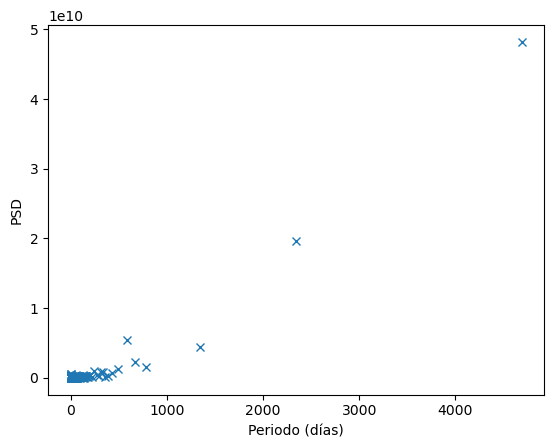

In [4]:
from scipy.signal import periodogram, find_peaks
frequencies, power_spectrum = periodogram(scaler3600s['ScalerCorr'], fs=1/3600)
peaks, _ = find_peaks(power_spectrum, height=2000)
periods = 1/frequencies/3600/24
plt.plot(periods[peaks], power_spectrum[peaks], 'x')
plt.xlabel('Periodo (días)')
plt.ylabel('PSD')
plt.show()

/tmp/ipykernel_22161/3663782014.py:18: RuntimeWarning: divide by zero encountered in true_divide
  period = 1/f/86400


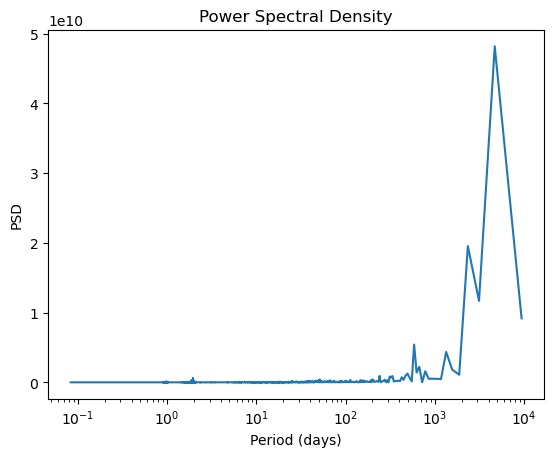

In [5]:
from scipy.signal import periodogram
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy import stats

# Seleccionar el período de tiempo acotado por los valores en la columna "Date"
start_date = "2006-01-01"
end_date = "2020-12-30"
mask = (scaler3600s['Date'] >= start_date) & (scaler3600s['Date'] <= end_date)
data = scaler3600s[mask]['ScalerCorr']

# Calcular el periodograma
fs = 1/3600 # Frecuencia de muestreo en Hz
f, psd = periodogram(data, fs=fs)

# Convertir la frecuencia a periodo en días
period = 1/f/86400




# Graficar el espectro de potencias
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.semilogx(period, psd)
#ax.set_xlim(periods.max(), periods.min()) # invertir el eje x



ax.set_xlabel('Period (days)')
ax.set_ylabel('PSD')
ax.set_title('Power Spectral Density')
#plt.yscale('log')
plt.show()